In [1]:
import pandas as pd
import numpy as np

d = pd.read_csv("dataset_for_concrete_machine.csv") 
print(d)

    SeNo  Cement   Sand  Aggregate  Total Weight    water Unit  final Weight  \
0      1       1    1.5          3           5.5    1.375   kg         6.875   
1      2       2    3.0          6          11.0    2.750   kg        13.750   
2      3       3    4.5          9          16.5    4.125   kg        20.625   
3      4       4    6.0         12          22.0    5.500   kg        27.500   
4      5       5    7.5         15          27.5    6.875   kg        34.375   
..   ...     ...    ...        ...           ...      ...  ...           ...   
94    96      96  144.0        288         528.0  132.000   kg       660.000   
95    97      97  145.5        291         533.5  133.375   kg       666.875   
96    98      98  147.0        294         539.0  134.750   kg       673.750   
97    99      99  148.5        297         544.5  136.125   kg       680.625   
98   100     100  150.0        300         550.0  137.500   kg       687.500   

    time  rotation  
0    2.5      60.0

In [4]:
d['Unit']=d['Unit'].astype('category')
d['Unit']=d['Unit'].cat.codes

In [5]:
d

,SeNo,Cement,Sand,Aggregate,Total Weight,water,Unit,final Weight,time,rotation
0,1,1,1.5,3,5.5,1.375,0,6.875,2.5,60.0
1,2,2,3.0,6,11.0,2.750,0,13.750,3.0,72.0
2,3,3,4.5,9,16.5,4.125,0,20.625,3.5,84.0
3,4,4,6.0,12,22.0,5.500,0,27.500,4.0,96.0
4,5,5,7.5,15,27.5,6.875,0,34.375,4.0,96.0
...,...,...,...,...,...,...,...,...,...,...
94,96,96,144.0,288,528.0,132.000,0,660.000,26.0,624.0
95,97,97,145.5,291,533.5,133.375,0,666.875,26.0,624.0
96,98,98,147.0,294,539.0,134.750,0,673.750,26.0,624.0
97,99,99,148.5,297,544.5,136.125,0,680.625,26.0,624.0


In [6]:
d.isnull().sum()

SeNo            0
Cement          0
Sand            0
Aggregate       0
Total Weight    0
water           0
Unit            0
final Weight    0
time            0
rotation        0
dtype: int64

In [7]:
X=d.drop(columns='rotation')
X

,SeNo,Cement,Sand,Aggregate,Total Weight,water,Unit,final Weight,time
0,1,1,1.5,3,5.5,1.375,0,6.875,2.5
1,2,2,3.0,6,11.0,2.750,0,13.750,3.0
2,3,3,4.5,9,16.5,4.125,0,20.625,3.5
3,4,4,6.0,12,22.0,5.500,0,27.500,4.0
4,5,5,7.5,15,27.5,6.875,0,34.375,4.0
...,...,...,...,...,...,...,...,...,...
94,96,96,144.0,288,528.0,132.000,0,660.000,26.0
95,97,97,145.5,291,533.5,133.375,0,666.875,26.0
96,98,98,147.0,294,539.0,134.750,0,673.750,26.0
97,99,99,148.5,297,544.5,136.125,0,680.625,26.0


In [8]:
y=d['rotation']
y

0      60.0
1      72.0
2      84.0
3      96.0
4      96.0
      ...  
94    624.0
95    624.0
96    624.0
97    624.0
98    624.0
Name: rotation, Length: 99, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train , y_test= train_test_split(X,y ,test_size=0.3,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [12]:
lr.fit(X_train ,y_train)

LinearRegression()

In [14]:
c=lr.intercept_
c

5.684341886080802e-14

m=lr.coefficient
m

In [16]:
m=lr.coef_
m

array([ 1.89583109e-15, -5.66213743e-15,  1.85962357e-15,  4.32986980e-15,
       -2.88102875e-14, -7.20257187e-15,  0.00000000e+00,  2.25375274e-14,
        2.40000000e+01])

In [17]:
y_pred_train=lr.predict(X_train)

In [18]:
y_pred_train

array([576. , 624. , 624. , 624. , 528. , 391.2, 297.6, 564. , 600. ,
       624. ,  72. , 600. , 460.8, 460.8,  96. , 240. , 297.6, 460.8,
       444. , 108. , 624. , 576. ,  60. , 444. , 391.2, 528. , 192. ,
       444. , 336. , 552. , 192. , 420. , 624. , 564. , 624. , 624. ,
       420. , 624. , 240. , 624. , 297.6, 420. , 528. , 624. , 624. ,
       624. , 297.6, 624. , 624. , 624. , 391.2, 444. , 624. , 504. ,
       460.8, 600. , 576. , 192. , 624. , 624. , 444. , 336. , 624. ,
       168. , 624. , 624. , 600. , 504. , 504. ])

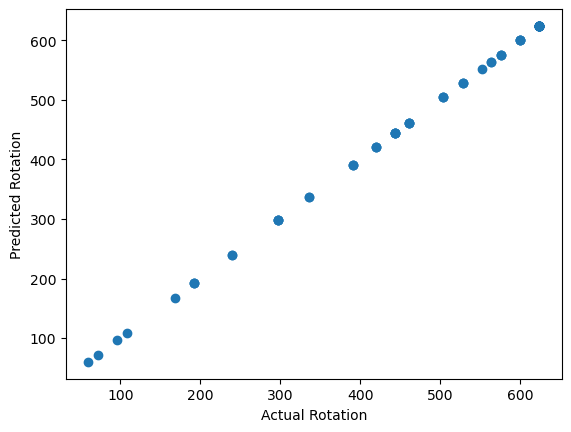

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_train , y_pred_train)
plt.xlabel("Actual Rotation")
plt.ylabel("Predicted Rotation")
plt.show()


In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_train, y_pred_train)

1.0

In [23]:
y_pred_test=lr.predict(X_test)

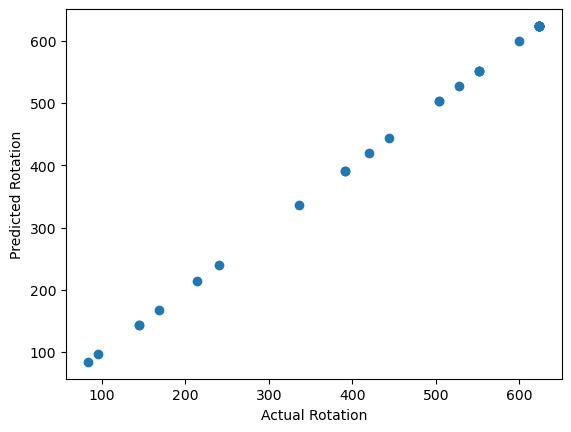

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test , y_pred_test)
plt.xlabel("Actual Rotation")
plt.ylabel("Predicted Rotation")
plt.show()

In [25]:
r2_score(y_test, y_pred_test)

1.0